# Machine Learning Assignment 2
### Lamya Daakir                          
ldaakir3                           
GTID# : 903529703                 
CS 7641

# Importing the necessary libraries

In [526]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
sns.set()
from pandas import Series, DataFrame
import mlrose
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

# Optimization Problems:

## Problem 1: four peaks problem

In [527]:
fitness = mlrose.FourPeaks(t_pct=0.15)
init_state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
fitness.evaluate(state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize = True, max_val = 8)
schedule = mlrose.ExpDecay()
max_iters=500
fitness=np.zeros(max_iters)

### Randomized hill climbing 

In [529]:
best_state, best_fitness, fitness_curve_rhc = mlrose.random_hill_climb(problem,max_attempts = 100, max_iters = 500,init_state = init_state, curve=True, random_state=1)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_rhc)]=fitness_curve_rhc
fitness[len(fitness_curve_rhc):]=fitness_curve_rhc[-1]
fitness_curve_rhc=fitness


[1 1 1 1 1 0 0 0 0 0 0 0]
19.0


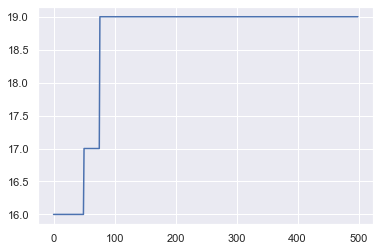

In [531]:
plt.plot(fitness_curve_rhc)

### Simulated annealing

In [532]:
best_state, best_fitness, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 100, max_iters = 500,init_state = init_state, curve=True,random_state = 1)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_sa)]=fitness_curve_sa
fitness[len(fitness_curve_sa):]=fitness_curve_sa[-1]
fitness_curve_sa=fitness

[1 1 1 0 0 0 0 0 0 0 0 0]
21.0


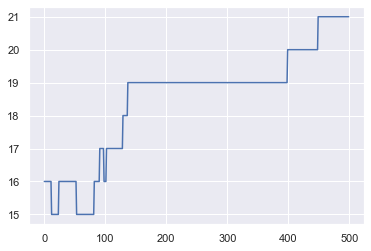

In [533]:
plt.plot(fitness_curve_sa)

### Genetic algorithm

In [534]:
best_state, best_fitness, fitness_curve_ga = mlrose.genetic_alg(problem, mutation_prob = 0.2, max_attempts = 100, max_iters=500, random_state = 1, curve=True)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_ga)]=fitness_curve_ga
fitness[len(fitness_curve_ga):]=fitness_curve_ga[-1]
fitness_curve_ga=fitness

[1 1 1 1 1 1 1 7 3 0 0 0]
19.0


### MIMIC 

In [535]:
best_state, best_fitness, fitness_curve_mimic = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=100, max_iters=500, curve=True, random_state=1, fast_mimic=False)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_mimic)]=fitness_curve_mimic
fitness[len(fitness_curve_mimic):]=fitness_curve_mimic[-1]
fitness_curve_mimic=fitness

[3 5 1 5 3 5 6 4 0 0 0 0]
4.0


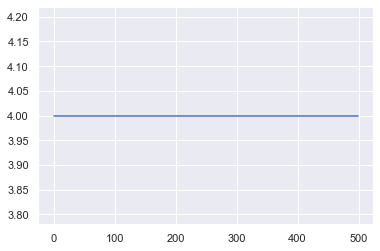

In [537]:
plt.plot(fitness_curve_mimic)

Text(0, 0.5, 'Fitness')

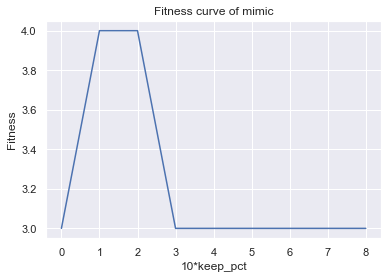

In [543]:
fitn=[]
for i in range(9) :   
    best_state, best_fitness, fitness_curve_mimic = mlrose.mimic(problem, pop_size=100, keep_pct=0.1*i, max_attempts=100, max_iters=500, curve=True, random_state=1, fast_mimic=False)
#     print(best_state)
#     print(best_fitness)
    fitn.append(best_fitness)
#     fitness=np.zeros(max_iters)
#     fitness[:len(fitness_curve_mimic)]=fitness_curve_mimic
#     fitness[len(fitness_curve_mimic):]=fitness_curve_mimic[-1]
#     fitness_curve_mimic=fitness
#     plt.plot(fitness_curve_mimic)
plt.plot(fitn)
plt.title("Fitness curve of mimic")
plt.xlabel("10*keep_pct")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

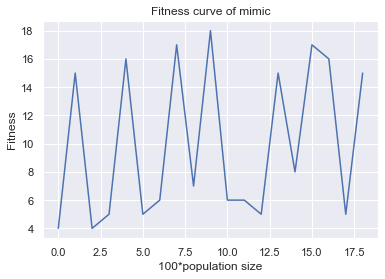

In [547]:
fitn=[]
for i in range(1,20) :  
    a=100*i
    best_state, best_fitness, fitness_curve_mimic = mlrose.mimic(problem, pop_size=a, keep_pct=0.2, max_attempts=100, max_iters=500, curve=True, random_state=1, fast_mimic=False)
#     print(best_state)
#     print(best_fitness)
    fitn.append(best_fitness)
#     fitness=np.zeros(max_iters)
#     fitness[:len(fitness_curve_mimic)]=fitness_curve_mimic
#     fitness[len(fitness_curve_mimic):]=fitness_curve_mimic[-1]
#     fitness_curve_mimic=fitness
#     plt.plot(fitness_curve_mimic)
plt.plot(fitn)
plt.title("Fitness curve of mimic")
plt.xlabel("100*population size")
plt.ylabel("Fitness")

### Comparison : 

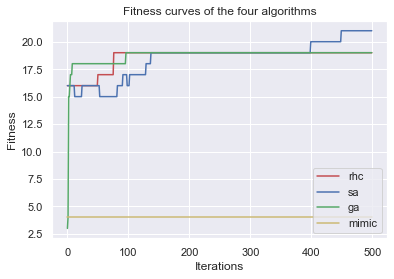

In [536]:
plt.plot(fitness_curve_rhc, 'r',label="rhc")
plt.plot(fitness_curve_sa, 'b',label="sa")
plt.plot(fitness_curve_ga, 'g',label="ga")
plt.plot(fitness_curve_mimic, 'y',label="mimic")
plt.title("Fitness curves of the four algorithms")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

## Problem 2: Travelling Salesman

In [554]:
coords_list = [(1, 2), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
problem= mlrose.TSPOpt(length = 8, coords = coords_list, maximize=True)
max_iters=500

### Randomized hill climbing 

In [555]:
best_state, best_fitness, fitness_curve_rhc = mlrose.random_hill_climb(problem,max_attempts = 200, max_iters = 500,curve=True, random_state=1)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_rhc)]=fitness_curve_rhc
fitness[len(fitness_curve_rhc):]=fitness_curve_rhc[-1]
fitness_curve_rhc=fitness

[1 5 7 2 6 3 0 4]
31.537396542145697


### Simulated annealing

[7 2 5 0 4 1 6 3]
31.176866671961257


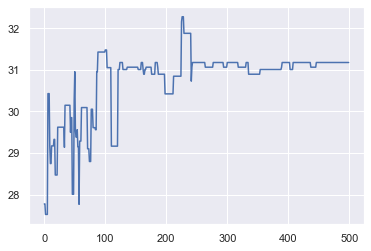

In [556]:
best_state, best_fitness, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 200, max_iters = 500,curve=True,random_state = 1)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_sa)]=fitness_curve_sa
fitness[len(fitness_curve_sa):]=fitness_curve_sa[-1]
fitness_curve_sa=fitness
plt.plot(fitness_curve_sa)

[7 2 5 0 4 1 6 3]
31.176866671961257


Text(0, 0.5, 'Fitness')

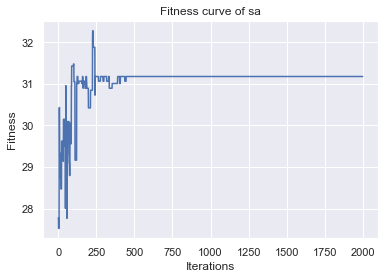

In [561]:

best_state, best_fitness, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 200, max_iters = 1000,curve=True,random_state = 1)
print(best_state)
print(best_fitness)
fitness=np.zeros(2000)
fitness[:len(fitness_curve_sa)]=fitness_curve_sa
fitness[len(fitness_curve_sa):]=fitness_curve_sa[-1]
fitness_curve_sa=fitness
plt.plot(fitness_curve_sa)
plt.title("Fitness curve of sa")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

[1 1 1 0 1 0]
11.0


Text(0, 0.5, 'Fitness')

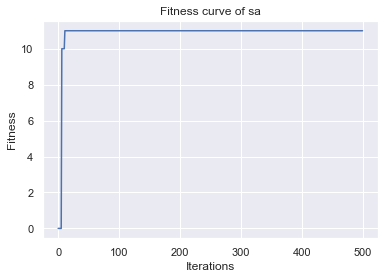

In [610]:
schedule = mlrose.GeomDecay(init_temp=50.0, decay=0.01, min_temp=0.1)
best_state, best_fitness, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 200, max_iters = 500,curve=True,random_state = 1)
print(best_state)
print(best_fitness)
fitness=np.zeros(500)
fitness[:len(fitness_curve_sa)]=fitness_curve_sa
fitness[len(fitness_curve_sa):]=fitness_curve_sa[-1]
fitness_curve_sa=fitness
plt.plot(fitness_curve_sa)
plt.title("Fitness curve of sa")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

In [ ]:
fitn=[]
for i in range(1,20) :  
    a=100*i
    best_state, best_fitness, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 200, max_iters = 1000,curve=True,random_state = 1)
#     print(best_state)
#     print(best_fitness)
    fitn.append(best_fitness)
#     fitness=np.zeros(max_iters)
#     fitness[:len(fitness_curve_mimic)]=fitness_curve_mimic
#     fitness[len(fitness_curve_mimic):]=fitness_curve_mimic[-1]
#     fitness_curve_mimic=fitness
#     plt.plot(fitness_curve_mimic)
plt.plot(fitn)
plt.title("Fitness curve of mimic")
plt.xlabel("100*population size")
plt.ylabel("Fitness")

### Genetic algorithm

In [424]:
best_state, best_fitness, fitness_curve_ga = mlrose.genetic_alg(problem, mutation_prob = 0.2, max_attempts = 100, max_iters=500, random_state = 1, curve=True)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_ga)]=fitness_curve_ga
fitness[len(fitness_curve_ga):]=fitness_curve_ga[-1]
fitness_curve_ga=fitness
plt.plot(fitness_curve_ga)

[3 6 1 5 2 7 4 0]
32.32596350159597


### MIMIC 

In [425]:
best_state, best_fitness, fitness_curve_mimic = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=100, max_iters=500, curve=True, random_state=1, fast_mimic=False)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_mimic)]=fitness_curve_mimic
fitness[len(fitness_curve_mimic):]=fitness_curve_mimic[-1]
fitness_curve_mimic=fitness

[1 0 3 7 4 6 2 5]
31.501857651037575


### Comparison : 

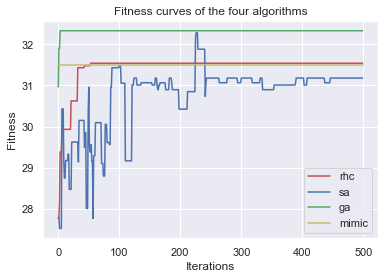

In [426]:
plt.plot(fitness_curve_rhc, 'r',label="rhc")
plt.plot(fitness_curve_sa, 'b',label="sa")
plt.plot(fitness_curve_ga, 'g',label="ga")
plt.plot(fitness_curve_mimic, 'y',label="mimic")
plt.title("Fitness curves of the four algorithms")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()


## Problem 3: Continous peaks

In [591]:
# fitness = mlrose.ContinuousPeaks(t_pct=0.15)
# init_state = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])
# fitness.evaluate(state)

# edges = [(1, 1), (0, 2), (3, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
# fitness = mlrose.MaxKColor(edges)
# init_state = np.array([0, 1, 0, 1, 0])
# fitness.evaluate(init_state)

# fitness = mlrose.SixPeaks(t_pct=0.15)
# init_state = np.array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])
# fitness.evaluate(init_state)

weights = [3, 7, 3, 10, 2,7]
values = [1, 2, 3, 4, 5,6]
max_weight_pct = 0.5
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
init_state = np.array([1, 7, 2, 2, 2,8])
fitness.evaluate(init_state)
# fitness = mlrose.FlipFlop()
# init_state = np.array([1, 1, 1, 1, 1, 1, 1])
# fitness.evaluate(init_state)

# fitness = mlrose.Queens()
# init_state = np.array([1, 11, 3, 3, 5, 10,30, 7])
# fitness.evaluate(init_state)

problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize = True, max_val = 2)
schedule = mlrose.ExpDecay()
max_iters=100
fitness=np.zeros(max_iters)

### Randomized hill climbing 

[1 7 2 2 2 8]
0.0


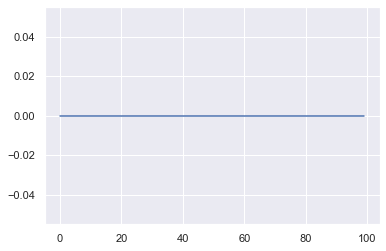

In [611]:
best_state, best_fitness, fitness_curve_rhc = mlrose.random_hill_climb(problem,max_attempts = 10, max_iters = 100,init_state = init_state, curve=True, random_state=1)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_rhc)]=fitness_curve_rhc
fitness[len(fitness_curve_rhc):]=fitness_curve_rhc[-1]
fitness_curve_rhc=fitness
plt.plot(fitness_curve_rhc)

[1 7 2 2 2 8]
0.0


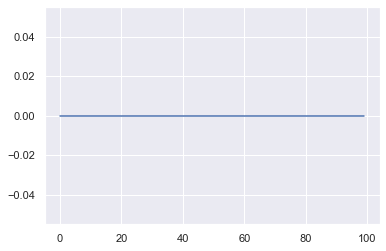

### Simulated annealing

[1 1 1 0 1 0]
11.0


C:\Users\Lamya\Anaconda3\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


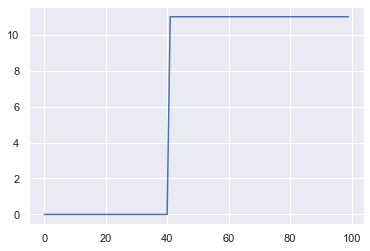

In [620]:
schedule = mlrose.GeomDecay(init_temp=10.0, decay=0.01, min_temp=0.01)
best_state, best_fitness, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 10, max_iters = 100,init_state = init_state, curve=True,random_state = 1)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_sa)]=fitness_curve_sa
fitness[len(fitness_curve_sa):]=fitness_curve_sa[-1]
fitness_curve_sa=fitness
plt.plot(fitness_curve_sa)

### Genetic algorithm

In [594]:
best_state, best_fitness, fitness_curve_ga = mlrose.genetic_alg(problem, mutation_prob = 0.2, max_attempts = 10, max_iters=100, random_state = 1, curve=True)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_ga)]=fitness_curve_ga
fitness[len(fitness_curve_ga):]=fitness_curve_ga[-1]
fitness_curve_ga=fitness

[1 0 1 0 1 1]
15.0


### MIMIC 

In [595]:
best_state, best_fitness, fitness_curve_mimic = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=100, curve=True, random_state=1, fast_mimic=False)
print(best_state)
print(best_fitness)
fitness=np.zeros(max_iters)
fitness[:len(fitness_curve_mimic)]=fitness_curve_mimic
fitness[len(fitness_curve_mimic):]=fitness_curve_mimic[-1]
fitness_curve_mimic=fitness

[1 0 1 0 1 1]
15.0


### Comparison : 

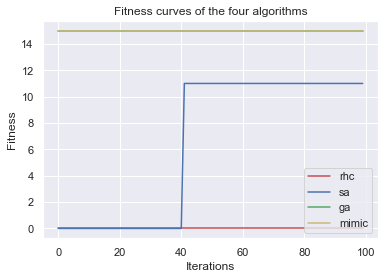

In [596]:
plt.plot(fitness_curve_rhc, 'r',label="rhc")
plt.plot(fitness_curve_sa, 'b',label="sa")
plt.plot(fitness_curve_ga, 'g',label="ga")
plt.plot(fitness_curve_mimic, 'y',label="mimic")
plt.title("Fitness curves of the four algorithms")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

# Finding the neural network weights:

In [621]:
dataset = pd.read_csv('seismic.csv', header = None)
X = dataset.iloc[1:, 1:19].values
Y = dataset.iloc[1:, 19].values
le_Y = LabelEncoder()
Y = le_Y.fit_transform(Y)
def encoder_X(index):
    le_X = LabelEncoder()
    X[:, index] = le_X.fit_transform(X[:, index])
to_be_encoded_indices = [0, 1, 2, 7]
for x in to_be_encoded_indices:
    encoder_X(x)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [622]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

# Neural Network

### Randomized hill climbing 

In [672]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100, \
                                 random_state = 3, curve=True)

nn_model1.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model1.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
print(y_train_accuracy)
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print(y_test_accuracy)

elapsed_time_fl = (time.time() - start) 
print(elapsed_time_fl)

0.75
0.8275862068965517
0.21647143363952637


In [673]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100, \
                                 random_state = 3, curve=True)

nn_model1.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model1.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
print(y_train_accuracy)
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print(y_test_accuracy)

elapsed_time_fl = (time.time() - start) 
print(elapsed_time_fl)

0.6827586206896552
0.6896551724137931
0.14657020568847656


In [630]:
error=[]
it=[]
for i in range(100):
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                     algorithm = 'random_hill_climb', max_iters = i, \
                                     bias = True, is_classifier = True, learning_rate = 0.01, \
                                     early_stopping = True, clip_max = 5, max_attempts = 100, \
                                     random_state = 3, curve=True)

    nn_model1.fit(X_train_scaled, y_train_hot)
    y_train_pred = nn_model1.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#     print(y_train_accuracy)
    y_test_pred = nn_model1.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
#     print(y_test_accuracy)
    error.append(nn_model1.loss)
    it.append(i)

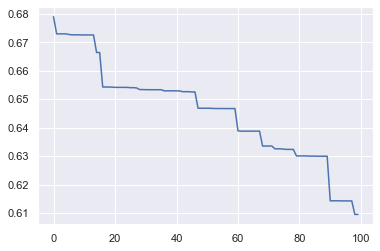

In [631]:
plt.plot(error)

### Simulated annealing

0.6741379310344827
0.6620689655172414
0.21043872833251953


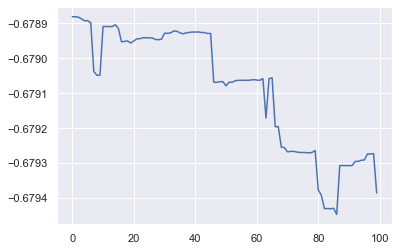

In [678]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100, \
                                 random_state = 3,curve=True)

nn_model1.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model1.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
print(y_train_accuracy)
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print(y_test_accuracy)


elapsed_time_fl = (time.time() - start) 
print(elapsed_time_fl)
fitness=nn_model1.fitness_curve
I=[]
for i in range(len(fitness)):
    I.append(i)
plt.plot(I,fitness)

### Genetic algorithm

0.75
0.8275862068965517
18.82309126853943


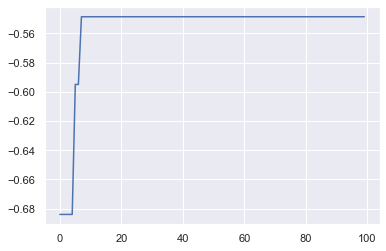

In [680]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3,curve=True)

nn_model1.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model1.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
print(y_train_accuracy)
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print(y_test_accuracy)

elapsed_time_fl = (time.time() - start) 
print(elapsed_time_fl)
fitness=nn_model1.fitness_curve
I=[]
for i in range(len(fitness)):
    I.append(i)
plt.plot(I,fitness)

Text(0, 0.5, 'Fitness')

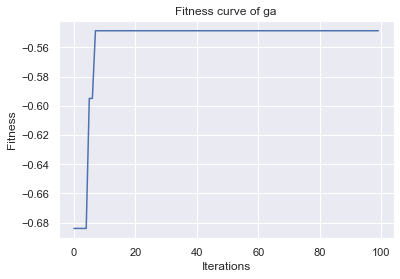

In [681]:
fitness=nn_model1.fitness_curve
I=[]
for i in range(len(fitness)):
    I.append(i)
plt.plot(I,fitness)
plt.title("Fitness curve of ga")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

### MIMIC 

In [656]:
nn_model1.fitness_curve

[]

0.75
0.8275862068965517
19.468356609344482


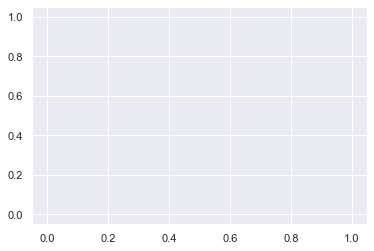

In [677]:
import time
start = time.time()
elapsed_time_fl = (time.time() - start) 

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model1.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
print(y_train_accuracy)
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print(y_test_accuracy)


elapsed_time_fl = (time.time() - start) 
print(elapsed_time_fl)
fitness=nn_model1.fitness_curve
I=[]
for i in range(len(fitness)):
    I.append(i)
plt.plot(I,fitness)

### Comparison : Genetic algorithm is best

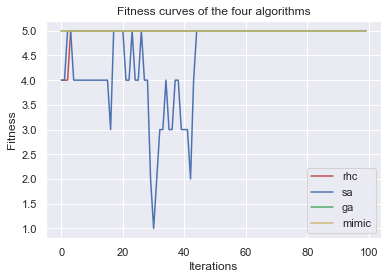

#### Sikora M., Wrobel L.: Application of rule induction algorithms for analysis of data collected by seismic hazard monitoring systems in coal mines. Archives of Mining Sciences, 55(1), 2010, 91-114.